In [13]:
import os
from google.colab import drive
drive.mount('/content/drive')
path=os.chdir('/content/drive/MyDrive/多媒體程式設計')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


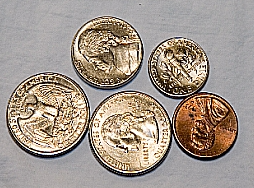

----------------------------------------------------------------------


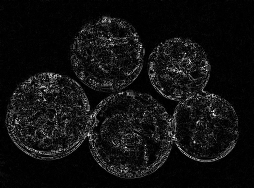

----------------------------------------------------------------------


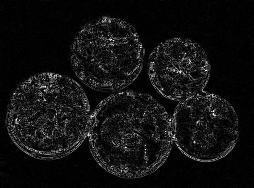

In [ ]:
#opencv Laplacian邊緣檢測
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread('coin.png')
cv2_imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)          # 轉成灰階
img = cv2.medianBlur(img, 5)                 # 模糊化，去除雜訊
output = cv2.Laplacian(img, cv2.CV_64F, 1, 1) 
output2 = np.uint8(np.absolute(output))
output3 = cv2.convertScaleAbs(output)
print('-'*70) 
cv2_imshow(output2)
print('-'*70)
cv2_imshow(output3)

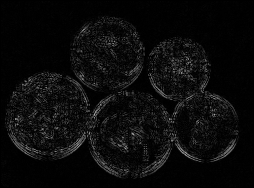

In [ ]:
#opencv Sobel邊緣檢測
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread('coin.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)          # 轉成灰階
#img = cv2.bilateralFilter(img, 50, 30, 30)                 # 模糊化，去除雜訊
img = cv2.medianBlur(img, 5) 
output  = cv2.Sobel(img, cv2.CV_64F, 1, 1, 1, 1)

output = np.uint8(np.absolute(output))
cv2_imshow(output)

對x軸做sobel的結果


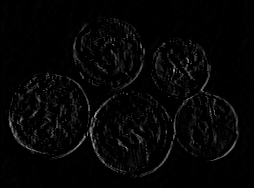

----------------------------------------------------------------------
對y軸做sobel的結果


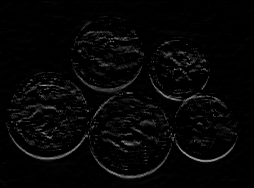

----------------------------------------------------------------------
對x軸做sobel的結果轉成8bits


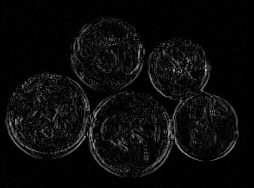

----------------------------------------------------------------------
權重相加的結果


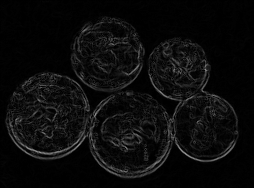

In [ ]:
#opencv Sobel邊緣檢測
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread('coin.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)          # 轉成灰階
#img = cv2.bilateralFilter(img, 50, 30, 30)         # 模糊化，去除雜訊
img = cv2.medianBlur(img, 5) 
grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, 1, 1)      #對x軸做sobel
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, 1, 1)      #對y軸做sobel
print('對x軸做sobel的結果')
cv2_imshow(grad_x)
print('-'*70)
print('對y軸做sobel的結果')
cv2_imshow(grad_y)
print('-'*70)
abs_grad_x = cv2.convertScaleAbs(grad_x)          #計算絕對值, 轉成8bit格式
print('對x軸做sobel的結果轉成8bits')
cv2_imshow(abs_grad_x)
print('-'*70)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)   #權重相加
print('權重相加的結果')
cv2_imshow(grad)

有做模糊化再做canny的結果


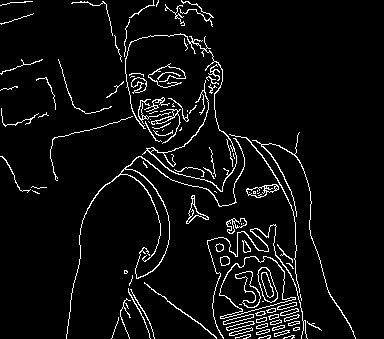

----------------------------------------------------------------------
沒有做模糊化直接做canny的結果


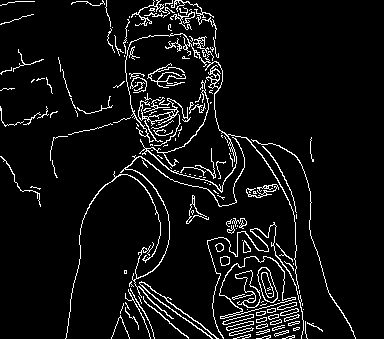

In [55]:
#opencv Canny邊緣檢測
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread('curry.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                      
#img = cv2.medianBlur(img, 5)
img_blur = cv2.GaussianBlur(img, (3, 3), 0) 
out_blurcanny = cv2.Canny(img_blur, 50, 150)
print('有做模糊化再做canny的結果')
cv2_imshow(out_blurcanny)
print('-'*70)
output_canny = cv2.Canny(img, 50, 150)
print('沒有做模糊化直接做canny的結果')
cv2_imshow(output_canny)

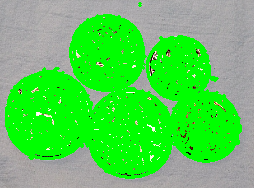

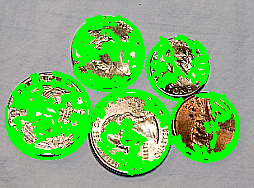

----------------------------------------------------------------------


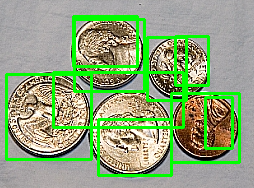

In [18]:
#opencv 物件輪廓檢測
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from imutils import contours

img = cv2.imread('coin.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img_gray = cv2.medianBlur(img, 5)
img_blur = cv2.GaussianBlur(img, (9, 9), 0)
img_gray = cv2.Canny(img, 50, 150)
cnts, hierarchy = cv2.findContours(img_gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
(cnts2, _) = contours.sort_contours(cnts)
cnts2 = [i for i in cnts2 if cv2.contourArea(i) > 100]
img2 = img.copy()
img4 = img.copy()
cv2.drawContours(img2, cnts, -1, (0, 255, 0), 2)
cv2_imshow(img2)
cv2.drawContours(img4, cnts2, -1, (0, 255, 0), 2)
cv2_imshow(img4)
print('-'*70)
img3=img.copy()
for (i, c) in enumerate(cnts2):
  #print(c)
  (x, y, w, h) = cv2.boundingRect(c)
  #print(x, y, w, h)
    
  cv2.rectangle(img3, (x,y), (x+w, y+h), (0,255,0), 2)
cv2_imshow(img3)

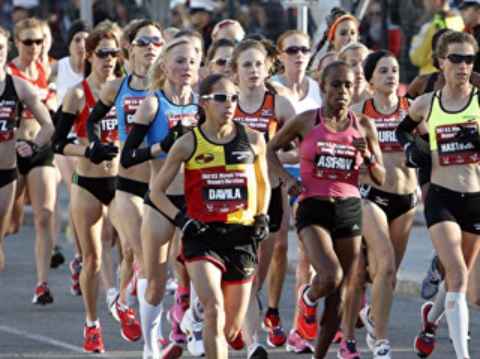

<class 'numpy.ndarray'>
----------------------------------------------------------------------


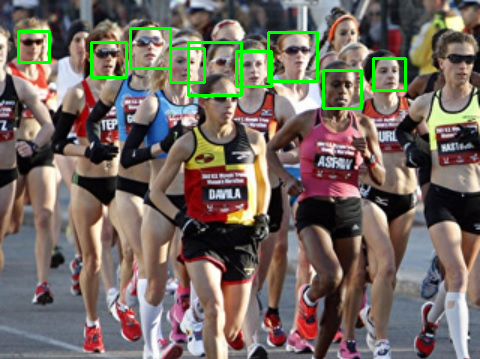

In [41]:
#opencv 人臉物件偵測
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
img = cv2.imread('marathon.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # 將圖片轉成灰階
cv2_imshow(img)
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")   # 載入人臉模型
faces = face_cascade.detectMultiScale(gray,1.05,4)    # 偵測人臉
print(type(faces))
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)    # 利用 for 迴圈，抓取每個人臉屬性，繪製方框
print('-'*70)
cv2_imshow(img)

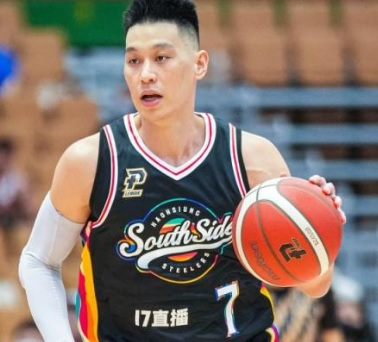

training...
ok!


In [42]:
#opencv 人臉辨識模型訓練
import cv2
import numpy as np
detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')  # 載入人臉追蹤模型

faces = []                                   # 儲存人臉位置大小的串列
ids = []                                    # 記錄該人臉 id 的串列

img = cv2.imread('lin.jpg')
cv2_imshow(img)                       # 讀取一張林書豪照片
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)              # 色彩轉換成黑白
img_np = np.array(gray,'uint8')                     # 轉換成指定編碼的 numpy 陣列
face = detector.detectMultiScale(gray)                  # 擷取人臉區域
for(x,y,w,h) in face:
  faces.append(img_np[y:y+h,x:x+w])                 # 記錄人臉的位置和大小內像素的數值
  ids.append(1)                           # 記錄人臉對應的 id，只能是整數，都是 1 表示林書豪的 id 為 1

recog = cv2.face.LBPHFaceRecognizer_create()                  # 啟用訓練人臉模型方法
print('training...')                                # 提示開始訓練
recog.train(faces,np.array(ids))                          # 開始訓練
recog.save('face.yml')                                # 訓練完成儲存為 face.yml
print('ok!')

122.91218918044305


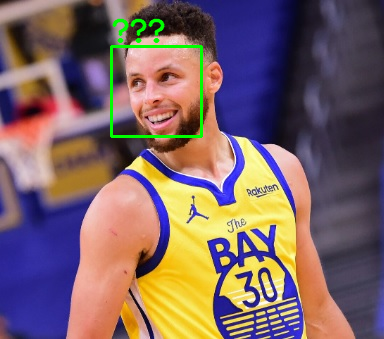

In [46]:
import cv2
recognizer = cv2.face.LBPHFaceRecognizer_create()                   # 啟用訓練人臉模型方法
recognizer.read('face.yml')                               # 讀取人臉模型檔
cascade_path = "haarcascade_frontalface_default.xml"                 # 載入人臉追蹤模型
face_cascade = cv2.CascadeClassifier(cascade_path)                  # 啟用人臉追蹤

# 建立姓名和 id 的對照表
name = {'1':'lin'}
#img = cv2.imread('lin2.jpg')
img = cv2.imread('curry.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detector.detectMultiScale(gray)
# 依序判斷每張臉屬於哪個 id
for(x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)                   # 標記人臉外框
  idnum,confidence = recognizer.predict(gray[y:y+h,x:x+w].copy())             # 取出 id 號碼以及信心指數 confidence
  print(confidence)
  if confidence > 123:
      text = name[str(idnum)]                          # 如果信心指數小於 60，取得對應的名字
  else:
      text = '???'                               # 不然名字就是 ???
  # 在人臉外框旁加上名字
  cv2.putText(img, text, (x,y-5),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)
cv2_imshow(img)